<font size=8 color=red><b>Feature Engineeering -- Part A</font>

In [130]:
import os
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer  
from statistics import mode 

from IPython.display import display, Markdown, Image

In [29]:
sys.path.insert(0, f"C:\classes\pdm\Classes")
from Classes.menu_A_a_data_utility import DataUtility

# A. Introduction

Feature engineering efforts mainly have two goals:
* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

特征工程工作主要有两个目标：
* 准备合适的输入数据集，与机器学习算法要求兼容。
* 提高机器学习模型的性能。

We spend 60% of our time in EDA and Featuring Engineering <br>
60% 的时间用于 EDA 和 特征工程


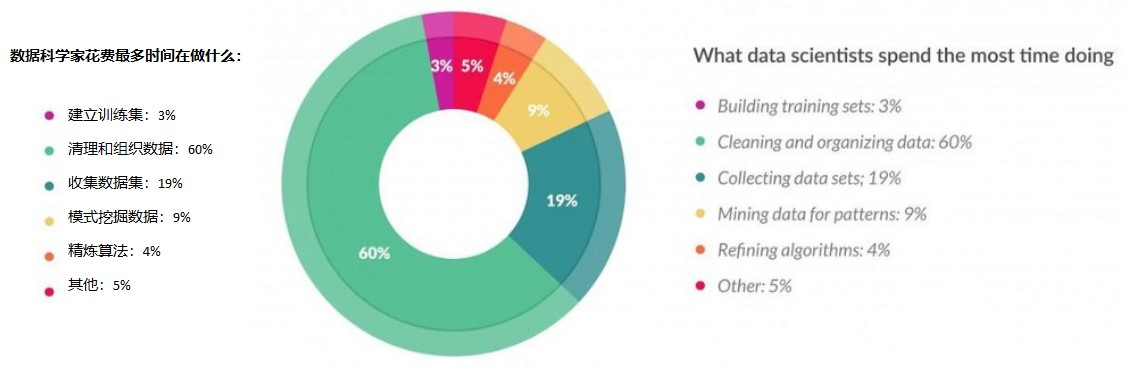

In [58]:
gif_path = os.path.dirname(os.getcwd()) + '/Classes/gifs/time_for_ds.jpg'
Image(gif_path)   

# B. Load Data

In [59]:
du = DataUtility()
DF_TRAIN, DF_TEST, DF_RESULT = du.prepare_dfs()

# C. Techniques
`List of Commons Techniques`

Common Techniques
1. Imputation
2. Handling Outliers
3. Binning
4. Log Transform
5. One-Hot Encoding
6. Grouping Operations
7. Feature Split
8. Scaling
9. Extracting Date

常用操作：

1. 插补
2. 处理异常值
3. 分箱
4. 对数变换
5. One-Hot 编码
6. 分组操作
7. 特征分割
8. 缩放
9. 提取日期

Advanced Techniques：
1. IterativeImputer
2. IsolationForest
3. MissForest from missingpy
4. Time series feature engineering: lag, rolling, expanding etc. 

其他操作：


## Prepare Data 准备数据
* Create a data set for demo 

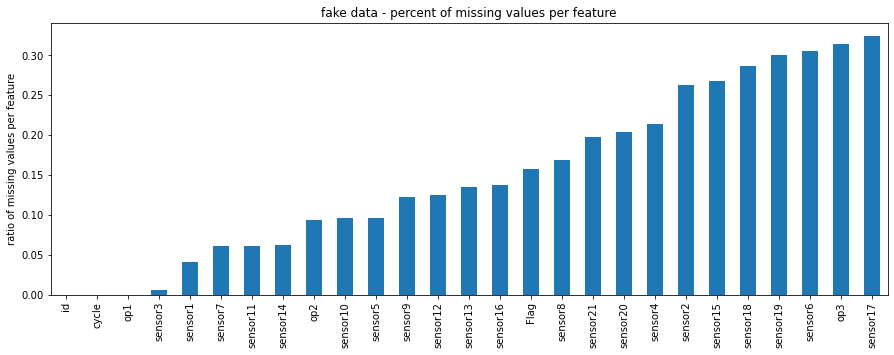

In [93]:
def create_demo_data(upper_limit):
    # upper_limit: percent of "masked" -- > None
    # prepare a fake data set 
    if upper_limit > 1:
        upper_limit = upper_limit/100
         
    tmp = DF_TRAIN.copy()  
    len_col = tmp.shape[0]  
    
    for c in list(tmp)[3:]:
        p = np.random.uniform(low = 0.0,high = upper_limit, size = None) # size int or tuple
        num = np.zeros(len_col) 
        tfs = np.random.choice([True, False], size=num.shape, p=[p,1-p])
        tmp[c] = tmp[c].mask(tfs)  
     
    tmp.isna().mean().sort_values().plot(
        kind="bar", figsize=(15,5), 
        title = "fake data - percent of missing values per feature", 
        ylabel = "ratio of missing values per feature")
    plt.show()
    
    return tmp 

TMP = create_demo_data(33.0)

## C1. Imputation 插补
* handling missing data 

### C1.1. drop missing 删除

In [99]:
tmp = TMP.copy()
print("before dropping", tmp.shape)
threshold = 0.2
#Dropping columns with missing value rate higher than threshold
tmp = tmp[tmp.columns[tmp.isnull().mean() < threshold]] 
#Dropping rows with missing value rate higher than threshold
tmp = tmp.loc[tmp.isnull().mean(axis=1) < threshold]
print("after dropping", tmp.shape)

before dropping (160359, 27)
after dropping (150475, 18)


## C1.2. Fill it 填补

`Numericals 连续数值`
* simple stats, mode, and knn

In [132]:
tmp = TMP.copy()
tmp2 = TMP.copy()
tmp = tmp.select_dtypes(include = "number") 
columns = tmp.columns
# defining the imputer
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean')
# sklearn will calculate for each column
#stateby: mean, median, most_frequent and constant. defaykt us mean 

# transform the dataset
tmp = pd.DataFrame(imputer.fit_transform(tmp))
tmp.columns = columns 

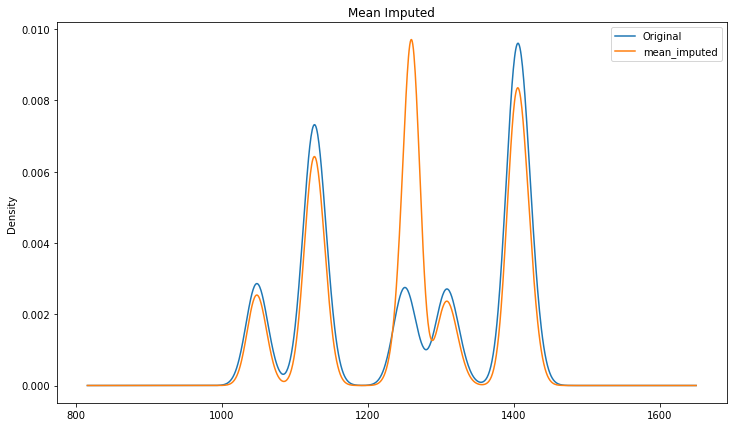

In [125]:
col = "sensor4" 
tmp_plot = pd.DataFrame({"Original": list(tmp2[col]), "mean_imputed": list(tmp[col])})
tmp_plot.plot(kind="kde", figsize = (12,7), title = "Mean Imputed")
plt.show()

In [133]:
# mode:
tmp = TMP.copy()
col = 'sensor4' 
tmp[col] = tmp[col].fillna(tmp[col].mode()[0])

In [136]:
# KNN
tmp = TMP.copy()
tmp2 = TMP.copy() 
tmp = tmp.select_dtypes(include = "number") 
columns = tmp.columns
# defining the imputer
imputer = KNNImputer(n_neighbors=2) 

# sklearn will calculate for each column
#stateby: mean, median, most_frequent and constant. defaykt us mean 
tmp = tmp.sample(100)
# transform the dataset
tmp = pd.DataFrame(imputer.fit_transform(tmp))
tmp.columns = columns 

In [ ]:
col = "sensor4" 
tmp_plot = pd.DataFrame({"Original": list(tmp2[col]), "mean_imputed": list(tmp[col])})
tmp_plot.plot(kind="kde", figsize = (12,7), title = "Mean Imputed")
plt.show()

`categorical 分类特征`
* most common

In [142]:
tmp = TMP.copy()

In [144]:
tmp['Flag'].fillna(tmp['Flag'].value_counts().idxmax(), inplace=True) 

`other method: ffill, bfill etc.`

In [146]:
#method : {'backfill', 'bfill', 'pad', 'ffill', None}


## C1.3. Handling Outliers 奇异值